In [1]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

In [4]:
net=nn.Sequential(nn.Flatten(),nn.Linear(784,10))

def init_weights(m):
    if type(m)==nn.Linear:
        nn.init.normal_(m.weight,std=0.01) #以均值0和标准差0.01随机初始化权重
        
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

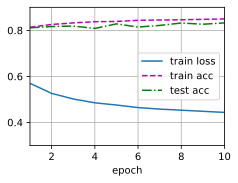

In [9]:
# reduction：在[none, mean, sum]中选，string型。none表示不降维，返回和target相同形状；
loss=nn.CrossEntropyLoss(reduction='none')

optim=torch.optim.SGD(net.parameters(),lr=0.1)

num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, optim)

In [10]:
help(nn.CrossEntropyLoss(reduction='none')) 

Help on CrossEntropyLoss in module torch.nn.modules.loss object:

class CrossEntropyLoss(_WeightedLoss)
 |  CrossEntropyLoss(weight: Union[torch.Tensor, NoneType] = None, size_average=None, ignore_index: int = -100, reduce=None, reduction: str = 'mean', label_smoothing: float = 0.0) -> None
 |  
 |  This criterion computes the cross entropy loss between input logits
 |  and target.
 |  
 |  It is useful when training a classification problem with `C` classes.
 |  If provided, the optional argument :attr:`weight` should be a 1D `Tensor`
 |  assigning weight to each of the classes.
 |  This is particularly useful when you have an unbalanced training set.
 |  
 |  The `input` is expected to contain the unnormalized logits for each class (which do `not` need
 |  to be positive or sum to 1, in general).
 |  `input` has to be a Tensor of size :math:`(C)` for unbatched input,
 |  :math:`(minibatch, C)` or :math:`(minibatch, C, d_1, d_2, ..., d_K)` with :math:`K \geq 1` for the
 |  `K`-dimensi